## Analyze Bread dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('BreadBasket_DMS.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [4]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [17]:
df['Item'].value_counts().head()

Coffee    5471
Bread     3325
Tea       1435
Cake      1025
Pastry     856
Name: Item, dtype: int64

In [18]:
type(df['Date'].iloc[0])

str

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [42]:
df['Year'] = df['Date'].apply(lambda time: time.year)
df['Month'] = df['Date'].apply(lambda time: time.month)
df['Day of Week'] = df['Date'].apply(lambda time: time.dayofweek)

In [43]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

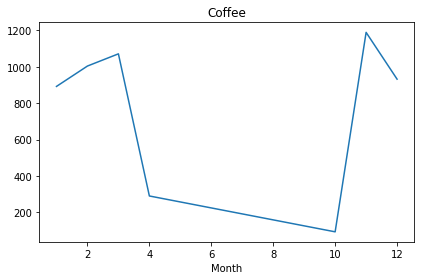

In [44]:
df[df['Item']=='Coffee'].groupby('Month')['Date'].count().plot()
plt.title('Coffee')
plt.tight_layout()

In [46]:
df_2017 = df[df['Year']==2017] # A lot of missing months! 

In [47]:
df_2017.head()

,Date,Time,Transaction,Item,Year,Month,Day of Week,day
8561,2017-01-01,01:21:05,4090,Bread,2017,1,Sun,<built-in method date of Timestamp object at 0...
8562,2017-01-03,09:08:01,4094,Coffee,2017,1,Tue,<built-in method date of Timestamp object at 0...
8563,2017-01-03,09:14:31,4095,Coffee,2017,1,Tue,<built-in method date of Timestamp object at 0...
8564,2017-01-03,09:14:31,4095,Toast,2017,1,Tue,<built-in method date of Timestamp object at 0...
8565,2017-01-03,09:17:54,4096,Farm House,2017,1,Tue,<built-in method date of Timestamp object at 0...


In [72]:
df_2017['Item'].value_counts().head()

Coffee      3257
Bread       1935
Tea          858
Cake         762
Sandwich     536
Name: Item, dtype: int64

In [74]:
selected_item = ['Coffee', 'Bread', 'Tea', 'Cake', 'Sandwich']
cleaned_2017 = df_2017.loc[df_2017['Item'].isin(selected_item)]

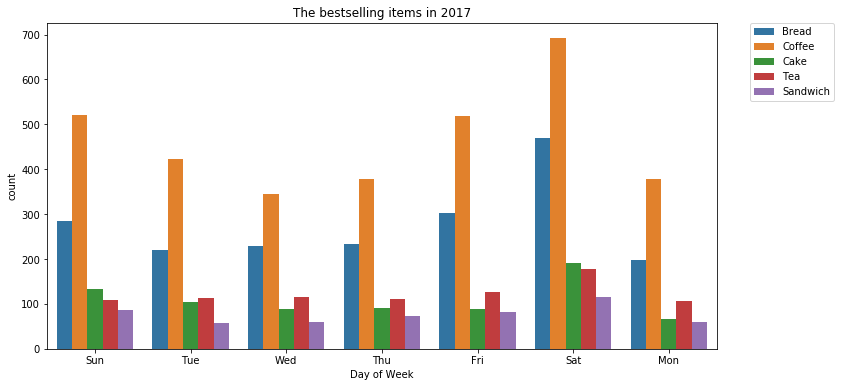

In [84]:
plt.figure(figsize=(12,6))
sns.countplot(x='Day of Week',data=cleaned_2017, hue='Item')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The bestselling items in 2017')
plt.show()